In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
#!pip install catboost
#from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, QuantileTransformer, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
!pip install sklearn-hierarchical-classification
from sklearn_hierarchical_classification import classifier
from sklearn_hierarchical_classification.constants import ROOT
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

  Created wheel for sklearn-hierarchical-classification: filename=sklearn_hierarchical_classification-1.3.2-py3-none-any.whl size=16937 sha256=b9dd44d5790a5cdbe69dffb27783f50060763672a41e33ef54059e07e6f37c47
  Stored in directory: /root/.cache/pip/wheels/1c/ac/f5/2c4ef64d070a88c295e551b3dcf7f992f5269b1f81585991c1
Successfully built sklearn-hierarchical-classification
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


## Data shape

In [2]:
dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/'
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
edf = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
print('Number of instances, features', df.shape)

Number of instances, features (10834, 18)


## Data Peek

In [3]:
print(df.head())

   ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   0  58238    971.303       397.202654       186.945510      2.124697   
1   1  44515    757.601       265.590470       213.967453      1.241266   
2   2  31662    653.783       239.902428       168.421505      1.424417   
3   3  38778    734.020       268.446281       184.061923      1.458456   
4   4  42530    775.403       281.212824       193.236878      1.455275   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1      0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2      0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3      0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4      0.726511       43028     232.703412  0.729816  0.988426   0.888895   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.6855

## Data Information

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

## Data Description

In [5]:
print(df.describe())

                 ID           Area     Perimeter  MajorAxisLength  \
count  10834.000000   10834.000000  10834.000000     10834.000000   
mean    5416.500000   53095.675189    855.274892       320.036169   
std     3127.650742   29542.542580    214.991122        85.961630   
min        0.000000   20420.000000    524.932000       183.601165   
25%     2708.250000   36343.500000    703.601250       253.501071   
50%     5416.500000   44645.000000    793.739500       296.377365   
75%     8124.750000   61295.000000    975.517500       376.068399   
max    10833.000000  254616.000000   1985.370000       738.860153   

       MinorAxisLength  AspectRation  Eccentricity     ConvexArea  \
count     10834.000000  10834.000000  10834.000000   10834.000000   
mean        202.410342      1.581294      0.750588   53816.205926   
std          45.113965      0.244314      0.091481   29999.710739   
min         129.576207      1.024868      0.218951   20684.000000   
25%         175.927024      1.432

## Identify Duplicates

In [6]:
dups = df.duplicated()
print(dups.any())

False


## Class Distribution

In [7]:
print(df.groupby('y').size())

y
BARBUNYA    1057
BOMBAY       418
CALI        1304
DERMASON    2837
HOROZ       1488
SEKER       1621
SIRA        2109
dtype: int64


## Data Visualization

### Features' Distribution

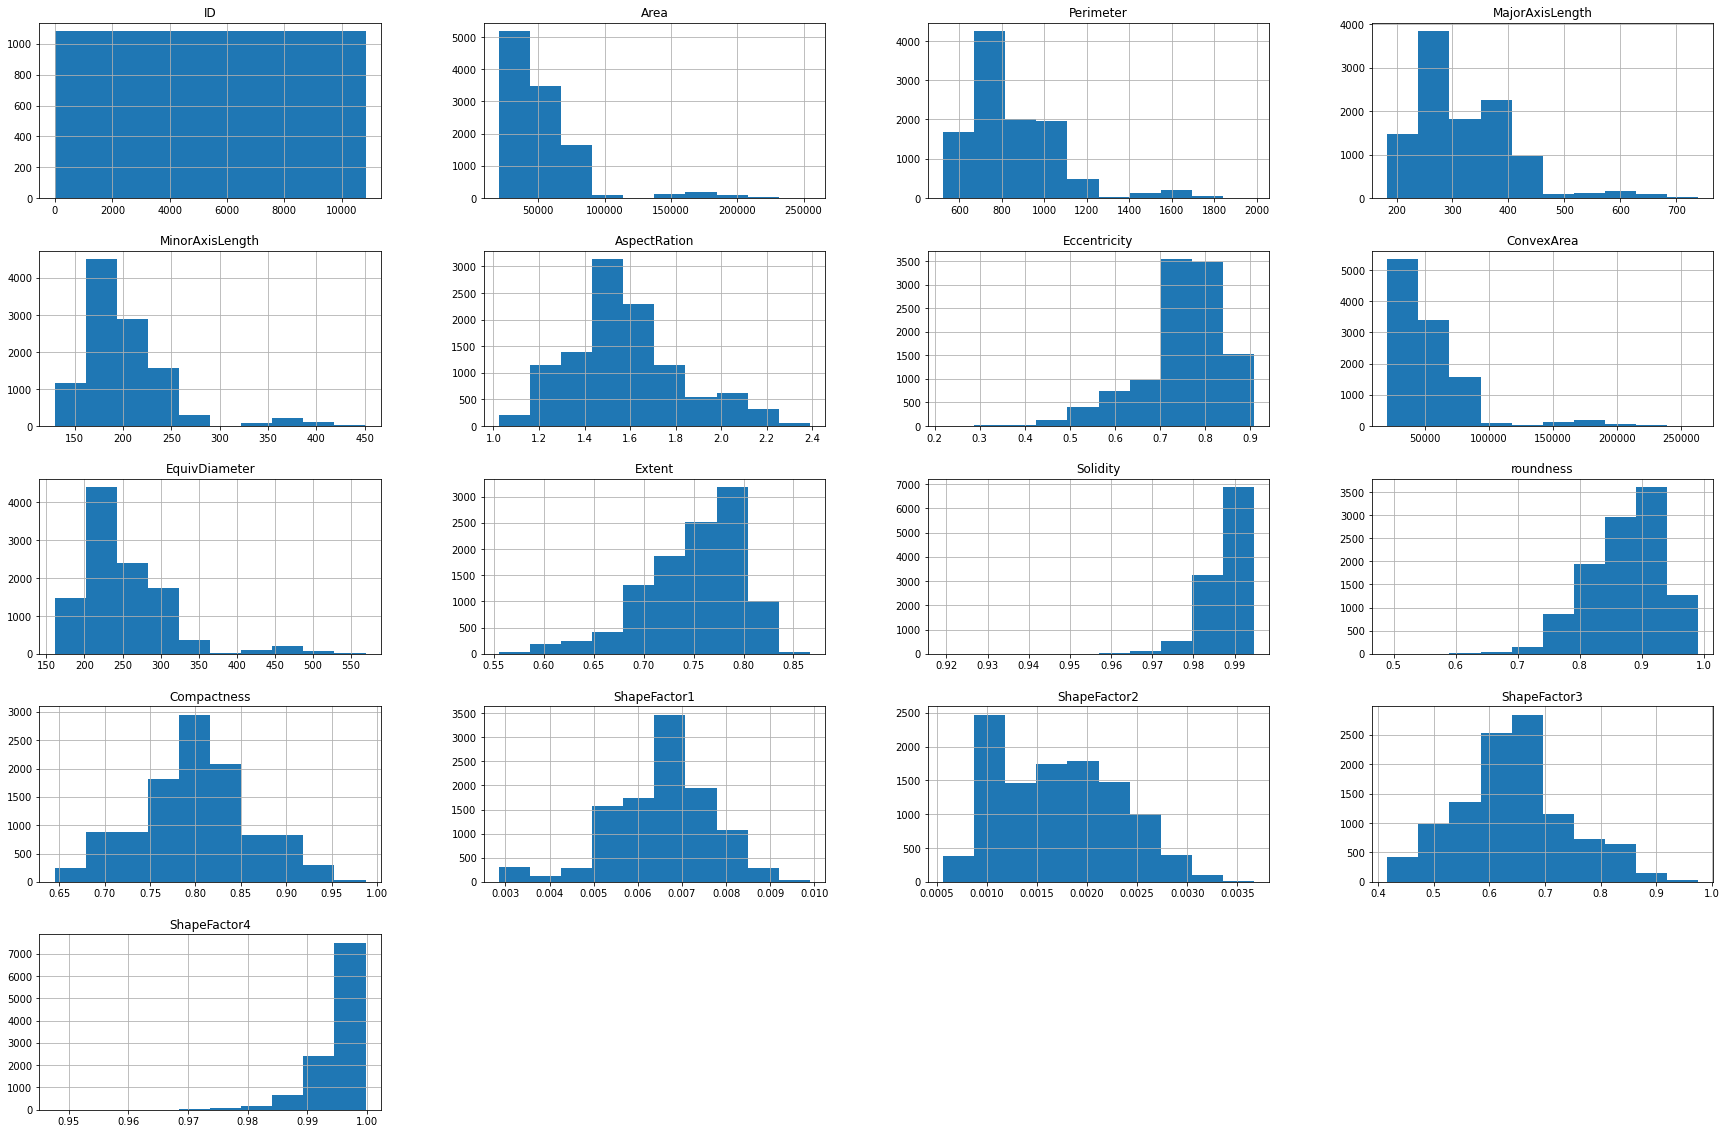

In [8]:
df.hist(figsize = (30,20))
plt.show()

### Scatter Plot Matrix

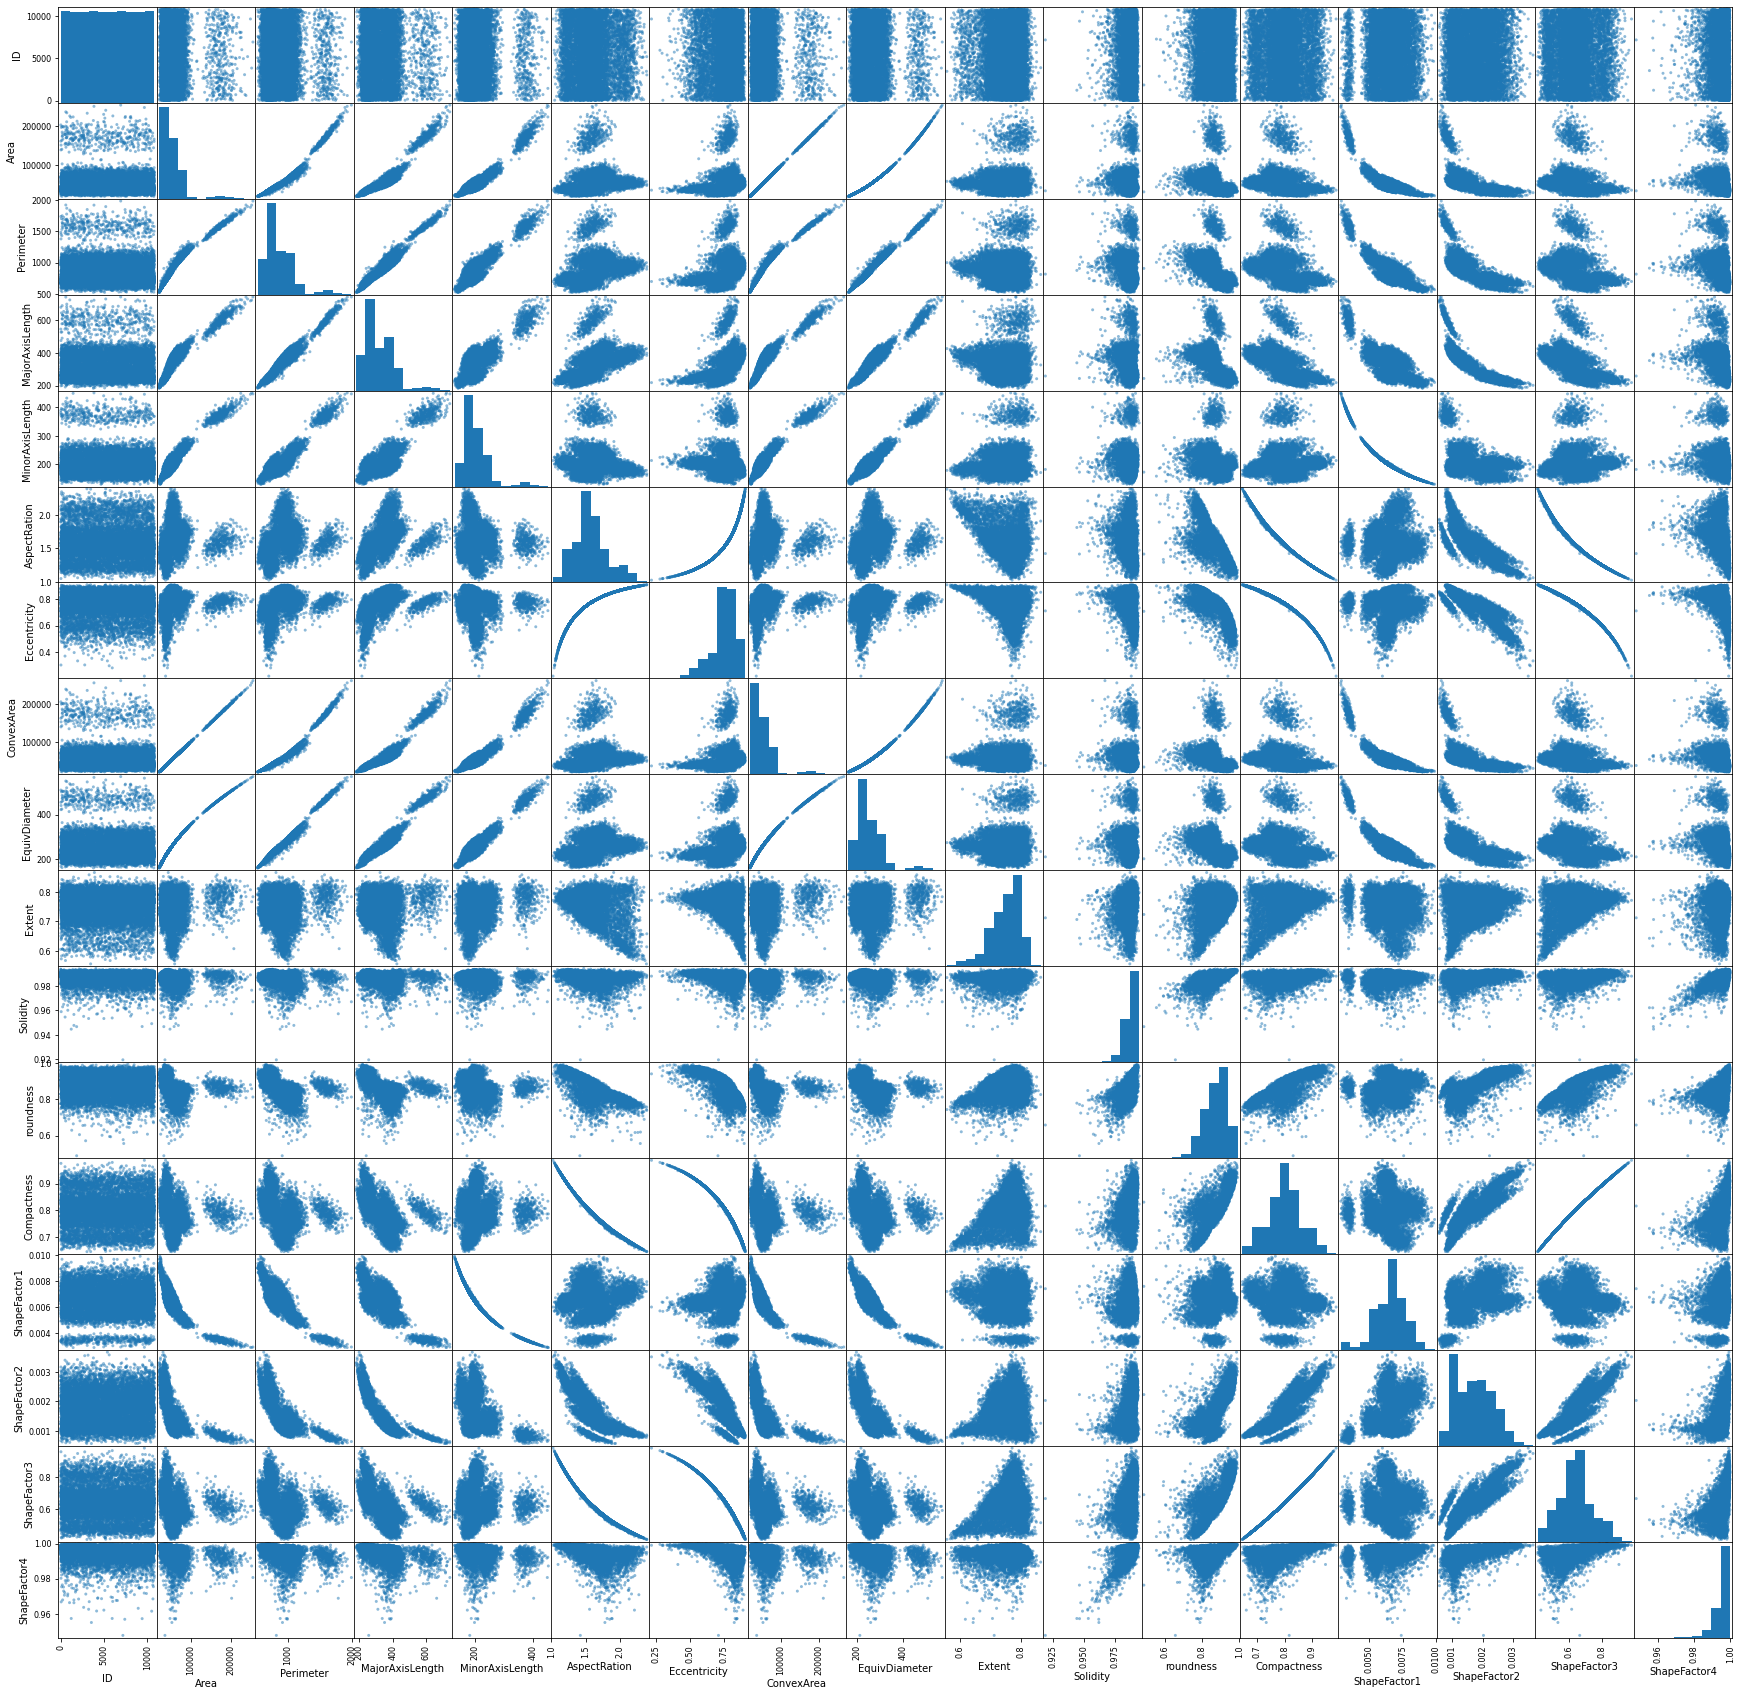

In [9]:
scatter_matrix(df, figsize=(30,30))
plt.show()

### Correlation Matrix

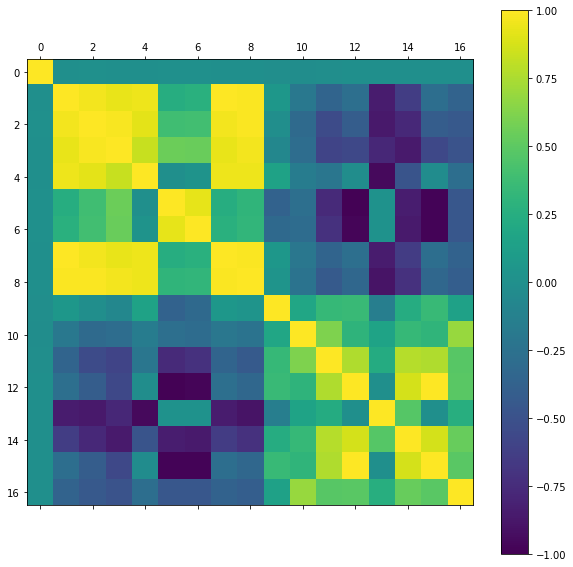

In [10]:
correlations = df.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

### Box Plot

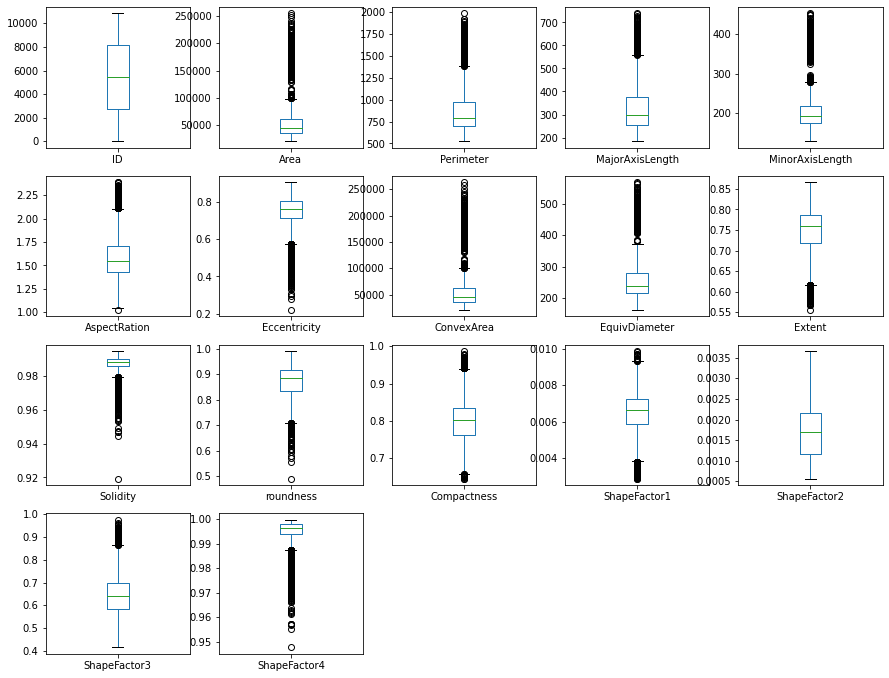

In [11]:
df.plot(kind='box', subplots=True, figsize=(15,15), layout=(5,5), sharex=False, sharey=False)
plt.show()

### Target vs Features

In [12]:
"""
df['Perimeter_area_ratio'] = df['Perimeter'] / df['Area']
df['Latus_length'] = df[['MajorAxisLength','MinorAxisLength']].apply(lambda x : (2*((x[1]/2)**2))/(x[0]/2) if (x[0]/2 >= x[1]/2) else((2*((x[0]/2)**2))/(x[1]/2)),axis=1)
#df['Semi_latus_length'] = df[['MajorAxisLength','MinorAxisLength']].apply(lambda x : (((x[1]/2)**2))/(x[0]/2) if (x[0]/2 >= x[1]/2) else((((x[0]/2)**2))/(x[1]/2)),axis=1)
#df['Mean_latus'] = df[['Latus_length','Semi_latus_length']].mean(axis=1)
#df['Mean_area'] = df[['Area','ConvexArea']].mean(axis=1)
#df['Equivalent_area'] = 3.14*(df['EquivDiameter']/2)**2
df['Thickness'] = (df['MajorAxisLength']/2) * df['Eccentricity']
df['Volume'] = 0.75 * 3.14 * (df['MajorAxisLength']/2) * (df['MinorAxisLength']/2) * df['Thickness']
df['Elongation'] = df['Area'] / df['Thickness']**2
df['Bounding_box_area'] = df['MajorAxisLength']*df['MinorAxisLength']
df['Fiber_length'] = (df['Perimeter'] - np.sqrt(abs(df['Perimeter']**2 - 16*df['Area']))) / 4
df['Fiber_width'] = df['Area'] / df['Fiber_length']
df['Curl'] = df['MajorAxisLength'] / df['Fiber_length']
#df['E_s'] = df['Extent'] * df['Solidity']
#df['Area_volume_ratio'] = df['Area'] / df['Volume']
df['Sphericity'] = np.cbrt(36*3.14*df['Volume']**2) / df['Area']
df['Mean_roundness'] = df[['roundness','Compactness']].mean(axis=1)
#df['Mean_axis_length'] = df[['MajorAxisLength','MinorAxisLength']].mean(axis=1)
df['Surface_area'] = df[['MajorAxisLength','MinorAxisLength','Thickness']].apply(lambda x: 4*3.14*(((x[0]*x[1])**1.6+(x[0]*x[2])**1.6+(x[1]*x[2])**1.6)/3)**(1/1.6) ,axis=1)
df['Directrix'] = df[['MajorAxisLength','MinorAxisLength','Eccentricity']].apply(lambda x : (x[0]/2) / (x[2]/2) if ((x[0]/2) >= (x[1]/2)) else((x[1]/2) / (x[2]/2)), axis=1)
df['Shape'] = df[['ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']].mean(axis=1)
df['Linear_eccentricity'] = df[['MajorAxisLength','MinorAxisLength']].apply(lambda x : np.sqrt((x[0]/2)**2 - (x[1]/2)**2),axis=1)
df['Focal_parameter'] = df[['MajorAxisLength','MinorAxisLength']].apply(lambda x : ((x[1]/2)**2) / np.sqrt((x[0]/2)**2 - (x[1]/2)**2) if (x[0]/2 >= x[1]/2) else(((x[0]/2)**2) / np.sqrt((x[0]/2)**2 - (x[1]/2)**2)),axis=1)
#df['Shape'] = df['ShapeFactor1'] + df['ShapeFactor2'] + df['ShapeFactor3'] + df['ShapeFactor4'] 
df['Form_factor'] = (4 * 3.14 * df['Area']) / np.sqrt(df['Perimeter'])
#df['Convex_hull_area'] = df['Area'] / df['Solidity']
df['Mass'] = df['Solidity'] * df['Volume']
df['Rectangularity'] = df['Area'] / df['Bounding_box_area']
"""

"\ndf['Perimeter_area_ratio'] = df['Perimeter'] / df['Area']\ndf['Latus_length'] = df[['MajorAxisLength','MinorAxisLength']].apply(lambda x : (2*((x[1]/2)**2))/(x[0]/2) if (x[0]/2 >= x[1]/2) else((2*((x[0]/2)**2))/(x[1]/2)),axis=1)\n#df['Semi_latus_length'] = df[['MajorAxisLength','MinorAxisLength']].apply(lambda x : (((x[1]/2)**2))/(x[0]/2) if (x[0]/2 >= x[1]/2) else((((x[0]/2)**2))/(x[1]/2)),axis=1)\n#df['Mean_latus'] = df[['Latus_length','Semi_latus_length']].mean(axis=1)\n#df['Mean_area'] = df[['Area','ConvexArea']].mean(axis=1)\n#df['Equivalent_area'] = 3.14*(df['EquivDiameter']/2)**2\ndf['Thickness'] = (df['MajorAxisLength']/2) * df['Eccentricity']\ndf['Volume'] = 0.75 * 3.14 * (df['MajorAxisLength']/2) * (df['MinorAxisLength']/2) * df['Thickness']\ndf['Elongation'] = df['Area'] / df['Thickness']**2\ndf['Bounding_box_area'] = df['MajorAxisLength']*df['MinorAxisLength']\ndf['Fiber_length'] = (df['Perimeter'] - np.sqrt(abs(df['Perimeter']**2 - 16*df['Area']))) / 4\ndf['Fiber_width'

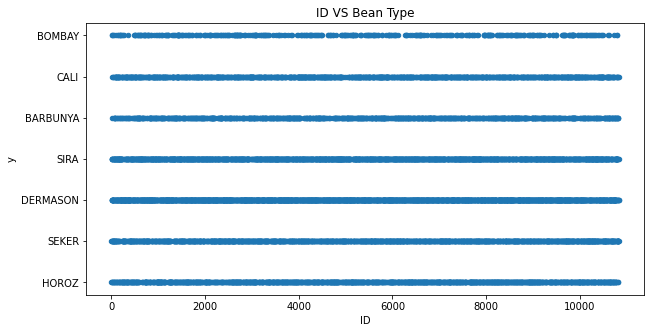

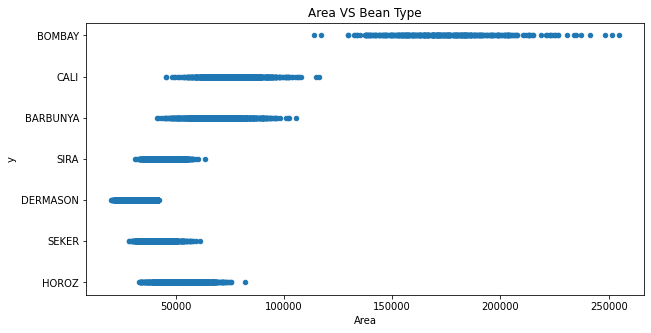

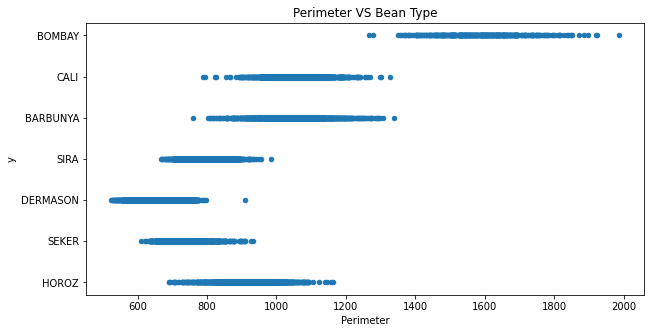

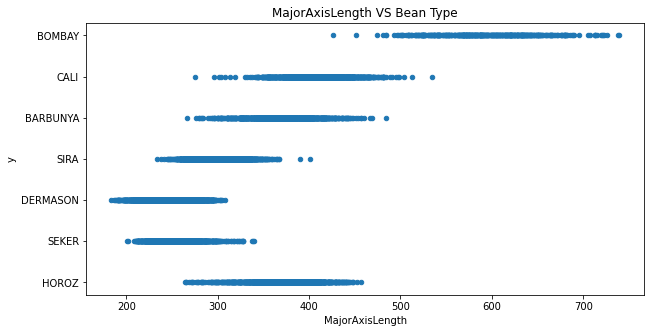

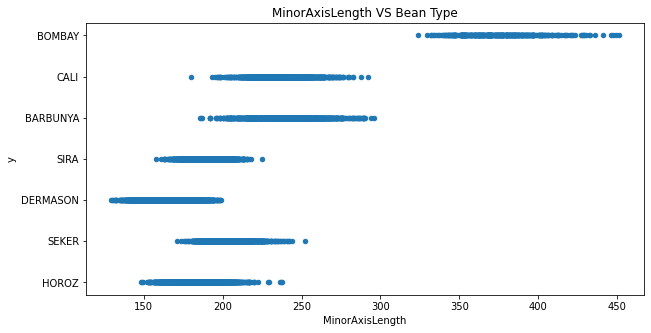

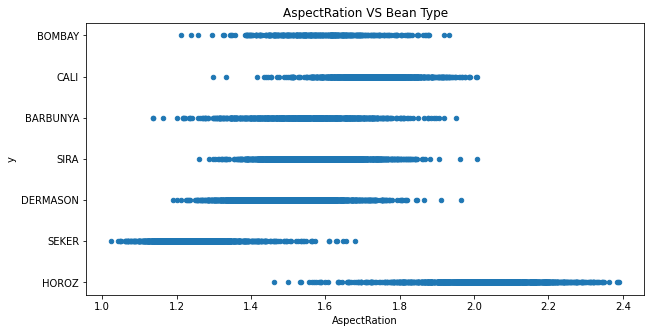

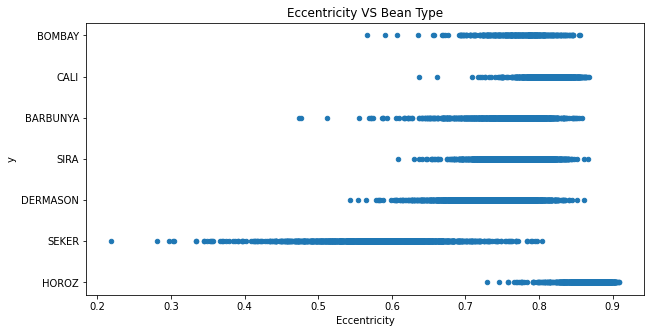

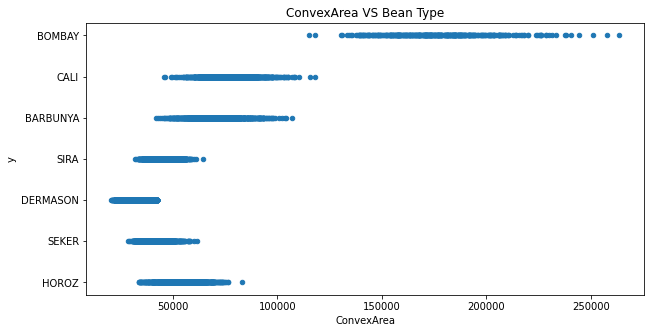

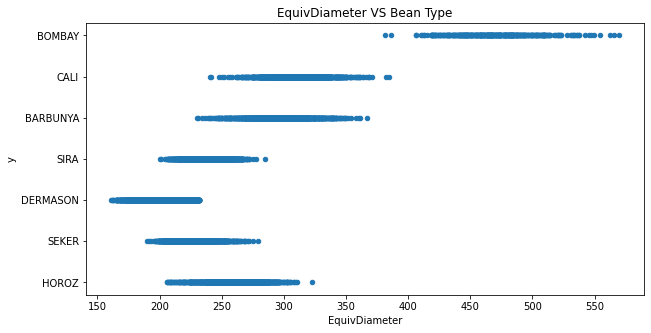

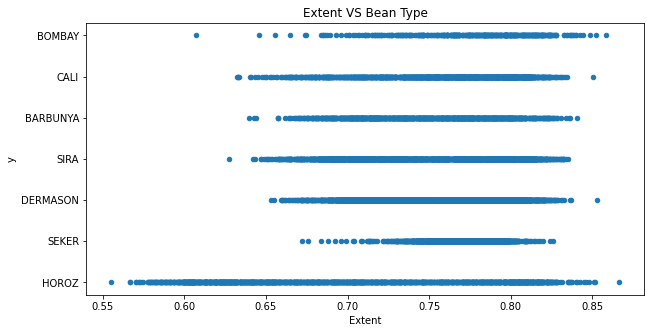

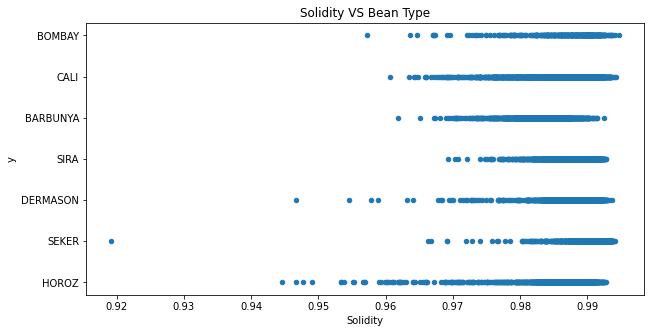

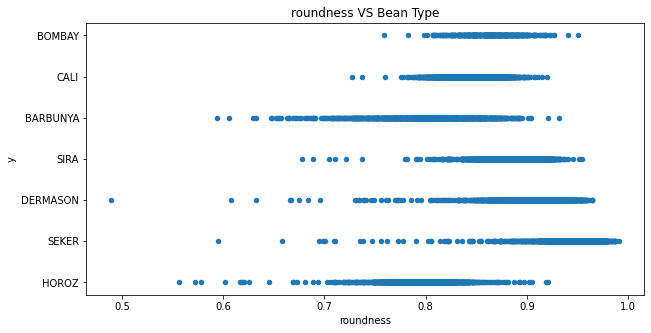

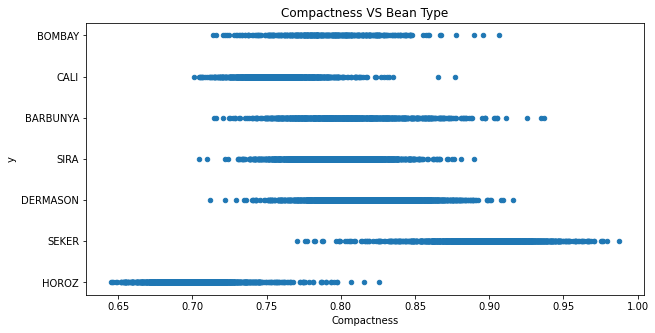

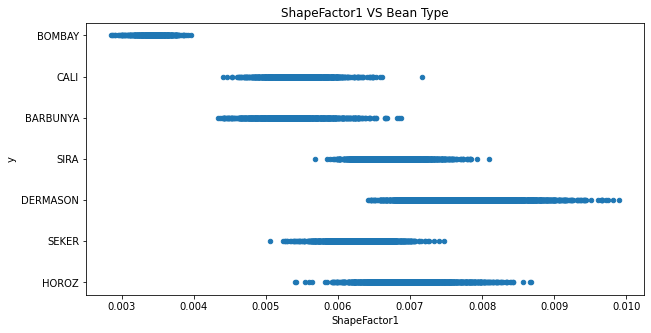

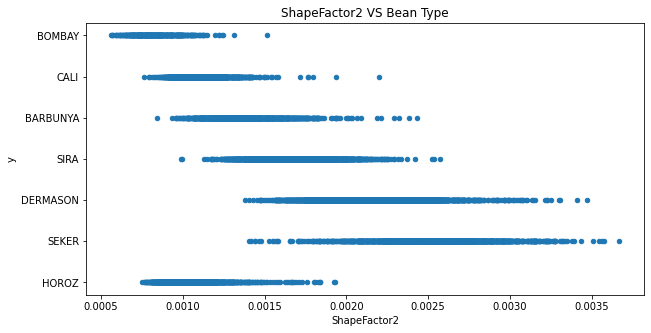

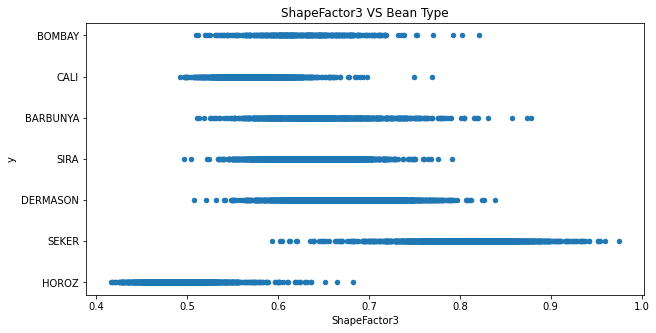

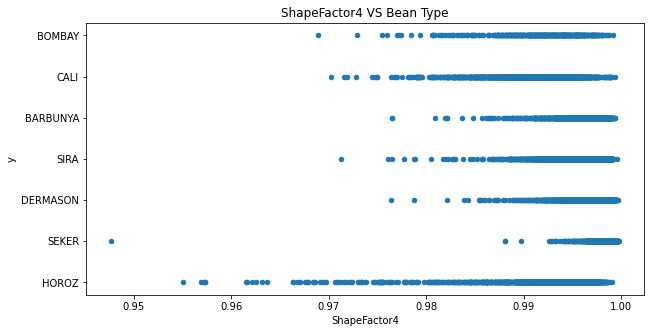

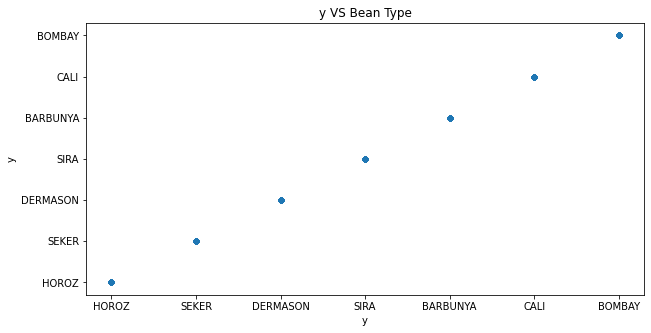

In [13]:
for predictor in df.columns:
    df.plot.scatter(x=predictor, y='y', figsize=(10,5), title=predictor+" VS "+ 'Bean Type')

### Target Distribution

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

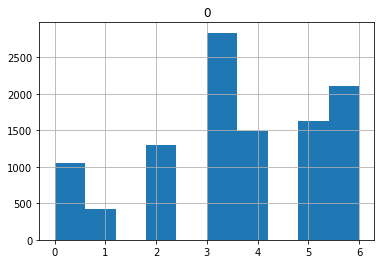

In [14]:
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(df['y'])
pd.DataFrame(target).hist()

### Clustering Analysis

In [15]:
#sns.relplot( x="MajorAxisLength", y="MinorAxisLength", hue="AspectRation", data=df, height=6);

In [16]:
#sns.pairplot(data=df, hue='y');
#plt.show()

## Data Preprocessing

In [17]:
dataset = df.drop(columns=['y'])

In [18]:
def add_features(df):
    df['Perimeter_area_ratio'] = df['Perimeter'] / df['Area']
    #df['Latus_length'] = df[['MajorAxisLength','MinorAxisLength']].apply(lambda x : (2*((x[1]/2)**2))/(x[0]/2) if (x[0]/2 >= x[1]/2) else((2*((x[0]/2)**2))/(x[1]/2)),axis=1)
    #df['Semi_latus_length'] = df[['MajorAxisLength','MinorAxisLength']].apply(lambda x : (((x[1]/2)**2))/(x[0]/2) if (x[0]/2 >= x[1]/2) else((((x[0]/2)**2))/(x[1]/2)),axis=1)
    #df['Mean_latus'] = df[['Latus_length','Semi_latus_length']].mean(axis=1)
    #df['Mean_area'] = df[['Area','ConvexArea']].mean(axis=1)
    #df['Equivalent_area'] = 3.14*(df['EquivDiameter']/2)**2
    df['Thickness'] = (df['MajorAxisLength']/2) * df['Eccentricity']
    #df['Volume'] = 0.75 * 3.14 * (df['MajorAxisLength']/2) * (df['MinorAxisLength']/2) * df['Thickness']
    #df['Elongation'] = df['Area'] / df['Thickness']**2
    #df['Bounding_box_area'] = df['MajorAxisLength']*df['MinorAxisLength']
    df['Fiber_length'] = (df['Perimeter'] - np.sqrt(abs(df['Perimeter']**2 - 16*df['Area']))) / 4
    #df['Fiber_width'] = df['Area'] / df['Fiber_length']
    #df['Curl'] = df['MajorAxisLength'] / df['Fiber_length']
    #df['E_s'] = df['Extent'] * df['Solidity']
    #df['Area_volume_ratio'] = df['Area'] / df['Volume']
    #df['Sphericity'] = np.cbrt(36*3.14*df['Volume']**2) / df['Area']
    df['Mean_roundness'] = df[['roundness','Compactness']].mean(axis=1)
    #df['Mean_axis_length'] = df[['MajorAxisLength','MinorAxisLength']].mean(axis=1)
    #df['Surface_area'] = df[['MajorAxisLength','MinorAxisLength','Thickness']].apply(lambda x: 4*3.14*(((x[0]*x[1])**1.6+(x[0]*x[2])**1.6+(x[1]*x[2])**1.6)/3)**(1/1.6) ,axis=1)
    #df['Directrix'] = df[['MajorAxisLength','MinorAxisLength','Eccentricity']].apply(lambda x : (x[0]/2) / (x[2]/2) if ((x[0]/2) >= (x[1]/2)) else((x[1]/2) / (x[2]/2)), axis=1)
    #df['Shape'] = df[['ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']].mean(axis=1)
    #df['Linear_eccentricity'] = df[['MajorAxisLength','MinorAxisLength']].apply(lambda x : np.sqrt((x[0]/2)**2 - (x[1]/2)**2),axis=1)
    #df['Focal_parameter'] = df[['MajorAxisLength','MinorAxisLength']].apply(lambda x : ((x[1]/2)**2) / np.sqrt((x[0]/2)**2 - (x[1]/2)**2) if (x[0]/2 >= x[1]/2) else(((x[0]/2)**2) / np.sqrt((x[0]/2)**2 - (x[1]/2)**2)),axis=1)
    #df['Shape'] = df['ShapeFactor1'] + df['ShapeFactor2'] + df['ShapeFactor3'] + df['ShapeFactor4'] 
    #df['Form_factor'] = (4 * 3.14 * df['Area']) / np.sqrt(df['Perimeter'])
    #df['Convex_hull_area'] = df['Area'] / df['Solidity']
    #df['Mass'] = df['Solidity'] * df['Volume']
    #df['Rectangularity'] = df['Area'] / df['Bounding_box_area']
    #X = df[['MajorAxisLength','MinorAxisLength','Area']]
    #kmeans = KMeans(n_clusters=6)
    #df["Cluster"] = kmeans.fit_predict(X)
    #df["Cluster"] = df["Cluster"].astype("category")

    return df

In [19]:
def select_features(df):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
    # fit the model
    rfe.fit(X, y)
    # transform the data
    X, y = rfe.transform(X, y)

In [20]:
def drop_columns(df):
    #df = df.drop(columns=['ID','roundness','Compactness','ConvexArea'])
    df = df.drop(columns=['ID'])
    return df

In [21]:
def remove_outliers(df):
    
    numeric_var = df.columns
    for i in numeric_var:
        q75, q25 = np.percentile(df.loc[:,i], [75, 25])
        iqr = q75 - q25
        Innerfence = q25 - (iqr*1.5)
        Upperfence = q75 + (iqr*1.5)
    
        df.loc[df[i]<Innerfence, i] = np.nan
        df.loc[df[i]>Upperfence, i] = np.nan
        
    imputer = KNNImputer(n_neighbors=5)
    df = imputer.fit_transform(df)
    return df
    

In [22]:
def rescale_data(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)

In [23]:
def transform_data(df):
    #return np.log1p(df)
    #power = PowerTransformer(method='yeo-johnson', standardize=True)
    power = QuantileTransformer(n_quantiles=100, output_distribution='normal')
    return power.fit_transform(df)

In [24]:
def perform_pca(df):
    pca = PCA(n_components=0.99)
    res = pca.fit_transform(df)
    return res

In [25]:
def preprocess_data(df):
    #df = add_features(df)
    df = drop_columns(df)
    print(df.info())
    print(df.head())
    #df = remove_outliers(df)
    #df = transform_data(df)
    df = rescale_data(df)
    #df = perform_pca(df)
    return df

In [26]:
train_df = preprocess_data(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.3 MB
None
    Are

## Models Evaluation

In [27]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
X = train_df
Y = df['y']

over = SMOTE()
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o',over),('u', under)]
pipeline = Pipeline(steps=steps)
#X, Y = pipeline.fit_resample(X, Y)

# define the method
#rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
# fit the model
#rfe.fit(X, Y)
# transform the data
#X, Y = rfe.transform(X, Y)


oversample = SMOTE()
# Balance dataset
#X, Y = oversample.fit_resample(X, Y)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)


In [28]:
"""
models = []
#models.append(('LR', LogisticRegression()))
estimators=[('lda',LinearDiscriminantAnalysis()),('svm',SVC(gamma = 0.14, C = 13))]
models.append(('Stacked',StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver='sag', max_iter=1000))))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Hist Gradient', HistGradientBoostingClassifier()))
#models.append(('Ada', AdaBoostClassifier()))
#models.append(('Gradient Booster', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
"""

'\nmodels = []\n#models.append((\'LR\', LogisticRegression()))\nestimators=[(\'lda\',LinearDiscriminantAnalysis()),(\'svm\',SVC(gamma = 0.14, C = 13))]\nmodels.append((\'Stacked\',StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver=\'sag\', max_iter=1000))))\nmodels.append((\'LDA\', LinearDiscriminantAnalysis()))\nmodels.append((\'KNN\', KNeighborsClassifier()))\nmodels.append((\'CART\', DecisionTreeClassifier()))\nmodels.append((\'Random Forest\', RandomForestClassifier()))\nmodels.append((\'Hist Gradient\', HistGradientBoostingClassifier()))\n#models.append((\'Ada\', AdaBoostClassifier()))\n#models.append((\'Gradient Booster\', GradientBoostingClassifier()))\nmodels.append((\'NB\', GaussianNB()))\nmodels.append((\'SVM\', SVC()))\n\nresults = []\nnames = []\nfor name, model in models:\n    kfold = KFold(n_splits=5)\n    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=\'accuracy\')\n    results.append(cv_results)\n    names.append

In [29]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
estimators=[('lda',LinearDiscriminantAnalysis()),('KNN', KNeighborsClassifier()),('svm',SVC(gamma = 0.14, C = 13)),('hg',HistGradientBoostingClassifier(max_depth=3, max_iter=60))]
imodel = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver='sag', max_iter=2000))
class_hierarchy = { ROOT: ["BOMBAY","D","C","HOROZ", "SEKER"], "C": ["DERMASON", "SIRA"],"D":["CALI", "BARBUNYA"]}
#fmodel = classifier.HierarchicalClassifier(base_estimator=SVC(gamma = 0.1, C = 5, probability=True),class_hierarchy=class_hierarchy)
fmodel = SVC(gamma = 0.1, C = 5)
#fmodel = RandomForestClassifier(max_depth=20)
#fmodel = AdaBoostClassifier(base_estimator = SVC(gamma = 0.1, C = 5, probability=True))
#fmodel = CatBoostClassifier(verbose=0, depth=3)
#fmodel = HistGradientBoostingClassifier(max_depth=3, max_iter=60, loss='categorical_crossentropy')
#fmodel =  AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 42), n_estimators = 20, learning_rate = 0.6, random_state = 42)
fmodel.fit(X_train,Y_train)
train_result = fmodel.predict(X_train)
valid_result = fmodel.predict(X_validation)
#fmodel.fit(X,Y).score(X_validation, valid_result)
print('Training score:', f1_score(Y_train, train_result,average='micro'))
print('Validation score:', f1_score(Y_validation, valid_result, average='micro'))

Training score: 0.9381562247605861
Validation score: 0.9344716197508076


In [30]:
print(classification_report(Y_validation, valid_result))

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.92      0.94       211
      BOMBAY       1.00      1.00      1.00        84
        CALI       0.94      0.97      0.96       261
    DERMASON       0.91      0.94      0.92       567
       HOROZ       0.98      0.96      0.97       298
       SEKER       0.96      0.94      0.95       324
        SIRA       0.88      0.87      0.88       422

    accuracy                           0.93      2167
   macro avg       0.95      0.94      0.95      2167
weighted avg       0.93      0.93      0.93      2167



In [31]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_validation, valid_result)
print(cm)

[[195   0  11   0   1   2   2]
 [  0  84   0   0   0   0   0]
 [  3   0 254   0   3   0   1]
 [  0   0   0 531   0   6  30]
 [  1   0   2   5 286   0   4]
 [  2   0   0   5   0 306  11]
 [  2   0   3  42   2   4 369]]


In [32]:
# normalize
row_sums = cm.sum(axis=1)
nm = cm / row_sums[:, np.newaxis]
# overlapping
ov = np.zeros(nm.shape)
for i in range(nm.shape[0]):
    for j in range(nm.shape[1]):
        if i != j:
            ov[i,j] = (nm[i,j]+nm[j,i])/2
        else:
            ov[i, j] = 1
# similarity
sm = np.zeros(ov.shape)
for i in range(ov.shape[0]):
    for j in range(ov.shape[1]):
        sm[i,j] = 1 - ov[i,j]

In [33]:
from plotly.figure_factory import create_dendrogram
dendro = create_dendrogram(sm, labels=['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA'])
dendro.show()

In [34]:
#XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=100)
#class_hierarchy = {ROOT: ["A","BOMBAY","B"], "A": ["SEKER", "C"],"C":["DERMASON","SIRA"], "B":["HOROZ","D"], "D":["BARBUNYA","CALI"]}
class_hierarchy = {ROOT: ["A","B"], "A": ["SEKER", "C"],"C":["DERMASON","SIRA"], "B":["BOMBAY","D"], "D":["HOROZ","E"] ,"E":["BARBUNYA","CALI"]}
fmodel_h = classifier.HierarchicalClassifier(base_estimator=SVC(gamma=0.1,C=5,probability=True),class_hierarchy=class_hierarchy)
fmodel_h.fit(X_train,Y_train)
train_result = fmodel_h.predict(X_train)
valid_result = fmodel_h.predict(X_validation)
print('Training score:', f1_score(Y_train, train_result,average='micro'))
print('Validation score:', f1_score(Y_validation, valid_result, average='micro'))
print(classification_report(Y_validation, valid_result))

Training score: 0.936887042806046
Validation score: 0.936317489616982
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.92      0.94       211
      BOMBAY       1.00      1.00      1.00        84
        CALI       0.95      0.97      0.96       261
    DERMASON       0.91      0.94      0.92       567
       HOROZ       0.98      0.96      0.97       298
       SEKER       0.98      0.94      0.96       324
        SIRA       0.89      0.88      0.88       422

    accuracy                           0.94      2167
   macro avg       0.95      0.95      0.95      2167
weighted avg       0.94      0.94      0.94      2167



In [35]:
from sklearn.metrics import confusion_matrix 
cm_new = confusion_matrix(Y_validation, valid_result)
print(cm_new)

[[195   0  11   0   2   2   1]
 [  0  84   0   0   0   0   0]
 [  5   0 252   0   3   0   1]
 [  0   0   0 534   0   3  30]
 [  0   0   2   5 287   0   4]
 [  2   0   0   5   0 306  11]
 [  2   0   1  44   2   2 371]]


In [36]:
X_test = preprocess_data(edf)
y_test_predicted = fmodel_h.predict(X_test)
edf['y'] = y_test_predicted
edf[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             2709 non-null   int64  
 1   Perimeter        2709 non-null   float64
 2   MajorAxisLength  2709 non-null   float64
 3   MinorAxisLength  2709 non-null   float64
 4   AspectRation     2709 non-null   float64
 5   Eccentricity     2709 non-null   float64
 6   ConvexArea       2709 non-null   int64  
 7   EquivDiameter    2709 non-null   float64
 8   Extent           2709 non-null   float64
 9   Solidity         2709 non-null   float64
 10  roundness        2709 non-null   float64
 11  Compactness      2709 non-null   float64
 12  ShapeFactor1     2709 non-null   float64
 13  ShapeFactor2     2709 non-null   float64
 14  ShapeFactor3     2709 non-null   float64
 15  ShapeFactor4     2709 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 338.8 KB
None
     Ar